# Summary statistics

`ScmRun` objects have methods specific to calculating summary statistics. In this notebook we demonstrate them.

At present, the following methods are available:

- `process_over`
- `quantiles_over`
- `groupby`
- `groupby_all_except`

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scmdata.run import ScmRun, run_append

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option("display.width", 120)
pd.set_option("display.max_columns", 15)
pd.set_option("display.max_colwidth", 80)
pd.set_option("display.min_rows", 20)

## Helper bits and piecs

In [3]:
def new_timeseries(
    n=101,
    count=1,
    model="example",
    scenario="ssp119",
    variable="Surface Temperature",
    unit="K",
    region="World",
    cls=ScmRun,
    **kwargs,
):
    data = np.random.rand(n, count) * np.arange(n)[:, np.newaxis]
    index = 2000 + np.arange(n)
    return cls(
        data,
        columns={
            "model": model,
            "scenario": scenario,
            "variable": variable,
            "region": region,
            "unit": unit,
            **kwargs,
        },
        index=index,
    )

Let's create an `ScmRun` which contains a few variables and a number of runs. Such a dataframe would be used to store the results from an ensemble of simple climate model runs.

In [4]:
# NBVAL_IGNORE_OUTPUT
runs = run_append(
    [
        new_timeseries(
            count=3,
            variable=[
                "Surface Temperature",
                "Atmospheric Concentrations|CO2",
                "Radiative Forcing",
            ],
            unit=["K", "ppm", "W/m^2"],
            run_id=run_id,
        )
        for run_id in range(10)
    ]
)
runs.metadata["source"] = "fake data"
runs

<ScmRun (timeseries: 30, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model region  run_id scenario   unit                        variable
	0   example  World       0   ssp119      K             Surface Temperature
	1   example  World       0   ssp119    ppm  Atmospheric Concentrations|CO2
	2   example  World       0   ssp119  W/m^2               Radiative Forcing
	3   example  World       1   ssp119      K             Surface Temperature
	4   example  World       1   ssp119    ppm  Atmospheric Concentrations|CO2
	5   example  World       1   ssp119  W/m^2               Radiative Forcing
	6   example  World       2   ssp119      K             Surface Temperature
	7   example  World       2   ssp119    ppm  Atmospheric Concentrations|CO2
	8   example  World       2   ssp119  W/m^2               Radiative Forcing
	9   example  World       3   ssp119      K             Surface Temperature
	10  example  World       3   ssp119    ppm  Atmospheri

## `process_over`

The `process_over` method allows us to calculate a specific set of statistics on groups of timeseries. A number of pandas functions can be called including "sum", "mean" and "describe".

In [5]:
print(runs.process_over.__doc__)


        Process the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        operation : str or func
            The operation to perform.

            If a string is provided, the equivalent pandas groupby function is used. Note
            that not all groupby functions are available as some do not make sense for
            this particular application. Additional information about the arguments for
            the pandas groupby functions can be found at <https://pandas.pydata.org/pan
            das-docs/stable/reference/groupby.html>`_.

            If a function is provided, it will be applied to each group. The function must
            take a dataframe as its first argument and return a DataFrame, Series or scalar.

            Note that quantile means the value of the data at a given point in the cumulative
        

### Mean

In [6]:
# NBVAL_IGNORE_OUTPUT
mean = runs.process_over(cols="run_id", operation="mean")
mean

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0    0.544200    1.237169    1.391303   
                        W/m^2 Radiative Forcing                      0.0    0.450652    0.704252    1.874093   
                        K     Surface Temperature                    0.0    0.509098    1.000322    1.623729   

time                                                          2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  \
model   region scenario unit  variable                                                            ...               
example World  ssp119   ppm   Atmospheric Concentrations|CO2    2.280427    2.284976    2.963718  ...   37.530181   
                        W/m^2 Radiative Forcing                 2.523567    3.102306    3.550064  ...   35.443199   
                        K     Surface Temperature               2.110046    2.154148    3.089248  ...   50.101831   

time                                                          2095-01-01  2096-01-01  2097-01-01  2098-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   ppm   Atmospheric Concentrations|CO2   54.212907   56.982167   41.741813   47.772304   
                        W/m^2 Radiative Forcing                40.578831   46.431627   49.603535   33.646813   
                        K     Surface Temperature              42.438411   43.391222   48.033850   60.472082   

time                                                          2099-01-01  2100-01-01  
model   region scenario unit  variable                                                
example World  ssp119   ppm   Atmospheric Concentrations|CO2   46.854595   65.899386  
                        W/m^2 Radiative Forcing                51.105430   31.962836  
                        K     Surface Temperature              65.846950   56.223060  

[3 rows x 101 columns]

### Median

In [7]:
# NBVAL_IGNORE_OUTPUT
median = runs.process_over(cols="run_id", operation="median")
median

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0    0.617682    1.312783    1.221876   
                        W/m^2 Radiative Forcing                      0.0    0.441453    0.597510    2.177090   
                        K     Surface Temperature                    0.0    0.529945    0.770689    1.684346   

time                                                          2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  \
model   region scenario unit  variable                                                            ...               
example World  ssp119   ppm   Atmospheric Concentrations|CO2    2.941552    1.927410    3.137693  ...   38.227323   
                        W/m^2 Radiative Forcing                 3.080652    3.323846    4.306169  ...   37.420570   
                        K     Surface Temperature               1.770226    1.643480    3.049613  ...   46.563026   

time                                                          2095-01-01  2096-01-01  2097-01-01  2098-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   ppm   Atmospheric Concentrations|CO2   53.055338   66.751287   39.458967   45.406584   
                        W/m^2 Radiative Forcing                36.106353   46.292869   61.325464   20.244930   
                        K     Surface Temperature              44.948953   36.223550   41.967118   60.738664   

time                                                          2099-01-01  2100-01-01  
model   region scenario unit  variable                                                
example World  ssp119   ppm   Atmospheric Concentrations|CO2   43.905345   63.829503  
                        W/m^2 Radiative Forcing                57.468463   24.007867  
                        K     Surface Temperature              72.623964   58.038509  

[3 rows x 101 columns]

### Arbitrary functions

You are also able to run arbitrary functions for each group

In [8]:
# NBVAL_IGNORE_OUTPUT
def mean_and_invert(df, axis=0):
    # Take a mean across the group and then invert the result
    return -df.mean(axis=axis)


runs.process_over("run_id", operation=mean_and_invert)

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   ppm   Atmospheric Concentrations|CO2        -0.0   -0.544200   -1.237169   -1.391303   
                        W/m^2 Radiative Forcing                     -0.0   -0.450652   -0.704252   -1.874093   
                        K     Surface Temperature                   -0.0   -0.509098   -1.000322   -1.623729   

time                                                          2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  \
model   region scenario unit  variable                                                            ...               
example World  ssp119   ppm   Atmospheric Concentrations|CO2   -2.280427   -2.284976   -2.963718  ...  -37.530181   
                        W/m^2 Radiative Forcing                -2.523567   -3.102306   -3.550064  ...  -35.443199   
                        K     Surface Temperature              -2.110046   -2.154148   -3.089248  ...  -50.101831   

time                                                          2095-01-01  2096-01-01  2097-01-01  2098-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   ppm   Atmospheric Concentrations|CO2  -54.212907  -56.982167  -41.741813  -47.772304   
                        W/m^2 Radiative Forcing               -40.578831  -46.431627  -49.603535  -33.646813   
                        K     Surface Temperature             -42.438411  -43.391222  -48.033850  -60.472082   

time                                                          2099-01-01  2100-01-01  
model   region scenario unit  variable                                                
example World  ssp119   ppm   Atmospheric Concentrations|CO2  -46.854595  -65.899386  
                        W/m^2 Radiative Forcing               -51.105430  -31.962836  
                        K     Surface Temperature             -65.846950  -56.223060  

[3 rows x 101 columns]

In [9]:
# NBVAL_IGNORE_OUTPUT
runs.process_over("run_id", operation=mean_and_invert, axis=1)

model    region  run_id  scenario  unit   variable                      
example  World   0       ssp119    ppm    Atmospheric Concentrations|CO2   -26.215725
                 1       ssp119    ppm    Atmospheric Concentrations|CO2   -25.074496
                 2       ssp119    ppm    Atmospheric Concentrations|CO2   -25.369400
                 3       ssp119    ppm    Atmospheric Concentrations|CO2   -24.317836
                 4       ssp119    ppm    Atmospheric Concentrations|CO2   -27.400119
                 5       ssp119    ppm    Atmospheric Concentrations|CO2   -25.857703
                 6       ssp119    ppm    Atmospheric Concentrations|CO2   -26.059039
                 7       ssp119    ppm    Atmospheric Concentrations|CO2   -26.683026
                 8       ssp119    ppm    Atmospheric Concentrations|CO2   -26.725901
                 9       ssp119    ppm    Atmospheric Concentrations|CO2   -24.159328
                 0       ssp119    W/m^2  Radiative Forcing        

### Other quantiles

In [10]:
# NBVAL_IGNORE_OUTPUT
lower_likely_quantile = runs.process_over(cols="run_id", operation="quantile", q=0.17)
lower_likely_quantile

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0    0.183948    0.956185    0.726950   
                        W/m^2 Radiative Forcing                      0.0    0.186346    0.337746    0.961706   
                        K     Surface Temperature                    0.0    0.241489    0.484815    1.124902   

time                                                          2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  \
model   region scenario unit  variable                                                            ...               
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.513603    1.224780    0.594631  ...   16.444508   
                        W/m^2 Radiative Forcing                 0.989104    1.424928    1.716441  ...    9.154577   
                        K     Surface Temperature               1.267544    0.752743    1.611483  ...   24.135339   

time                                                          2095-01-01  2096-01-01  2097-01-01  2098-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   ppm   Atmospheric Concentrations|CO2   44.234150   32.310428   21.041838   29.531098   
                        W/m^2 Radiative Forcing                27.207194   19.918517    9.579548    7.278039   
                        K     Surface Temperature              29.438333   10.286973   24.837197   33.298199   

time                                                          2099-01-01  2100-01-01  
model   region scenario unit  variable                                                
example World  ssp119   ppm   Atmospheric Concentrations|CO2   21.633880   38.027463  
                        W/m^2 Radiative Forcing                28.799908    5.786194  
                        K     Surface Temperature              46.647887   32.190968  

[3 rows x 101 columns]

## `quantiles_over`

If you want to calculate more than one summary statistic, `quantiles_over` will calculate and label multiple summary statistics before returning them.

In [11]:
print(runs.quantiles_over.__doc__)


        Calculate quantiles of the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        quantiles
            The quantiles to calculate. This should be a list of quantiles to calculate
            (quantile values between 0 and 1). ``quantiles`` can also include the strings
            "median" or "mean" if these values are to be calculated.

        **kwargs
            Passed to :meth:`~ScmRun.process_over`.

        Returns
        -------
        :class:`pandas.DataFrame`
            The quantiles of the timeseries, grouped by all columns in :attr:`meta`
            other than :obj:`cols`. Each calculated quantile is given a label which is
            stored in the ``quantile`` column within the output index.

        Raises
        ------
        TypeError
            ``operation`` is included in ``kwargs``. The op

In [12]:
# NBVAL_IGNORE_OUTPUT
summary_stats = runs.quantiles_over(
    cols="run_id", quantiles=[0.05, 0.17, 0.5, 0.83, 0.95, "mean", "median"]
)
summary_stats

time                                                                   2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                       quantile                                                   
example World  ssp119   ppm   Atmospheric Concentrations|CO2 0.05             0.0    0.095481    0.466993    0.561778   
                        W/m^2 Radiative Forcing              0.05             0.0    0.125208    0.152717    0.197862   
                        K     Surface Temperature            0.05             0.0    0.139500    0.390627    0.671010   
                        ppm   Atmospheric Concentrations|CO2 0.17             0.0    0.183948    0.956185    0.726950   
                        W/m^2 Radiative Forcing              0.17             0.0    0.186346    0.337746    0.961706   
                        K     Surface Temperature            0.17             0.0    0.241489    0.484815    1.124902   
                        ppm   Atmospheric Concentrations|CO2 0.5              0.0    0.617682    1.312783    1.221876   
                        W/m^2 Radiative Forcing              0.5              0.0    0.441453    0.597510    2.177090   
                        K     Surface Temperature            0.5              0.0    0.529945    0.770689    1.684346   
                        ppm   Atmospheric Concentrations|CO2 0.83             0.0    0.871410    1.683416    2.032958   
                        W/m^2 Radiative Forcing              0.83             0.0    0.775916    1.143691    2.684215   
                        K     Surface Temperature            0.83             0.0    0.776043    1.650703    2.257651   
                        ppm   Atmospheric Concentrations|CO2 0.95             0.0    0.935537    1.759024    2.713781   
                        W/m^2 Radiative Forcing              0.95             0.0    0.843564    1.297220    2.786044   
                        K     Surface Temperature            0.95             0.0    0.916145    1.891945    2.537259   
                        ppm   Atmospheric Concentrations|CO2 mean             0.0    0.544200    1.237169    1.391303   
                        W/m^2 Radiative Forcing              mean             0.0    0.450652    0.704252    1.874093   
                        K     Surface Temperature            mean             0.0    0.509098    1.000322    1.623729   
                        ppm   Atmospheric Concentrations|CO2 median           0.0    0.617682    1.312783    1.221876   
                        W/m^2 Radiative Forcing              median           0.0    0.441453    0.597510    2.177090   
                        K     Surface Temperature            median           0.0    0.529945    0.770689    1.684346   

time                                                                   2004-01-01  2005-01-01  2006-01-01  ...  \
model   region scenario unit  variable                       quantile                                      ...   
example World  ssp119   ppm   Atmospheric Concentrations|CO2 0.05        0.235380    1.066723    0.244359  ...   
                        W/m^2 Radiative Forcing              0.05        0.189154    1.238316    0.348395  ...   
                        K     Surface Temperature            0.05        0.497617    0.258500    1.239002  ...   
                        ppm   Atmospheric Concentrations|CO2 0.17        0.513603    1.224780    0.594631  ...   
                        W/m^2 Radiative Forcing              0.17        0.989104    1.424928    1.716441  ...   
                        K     Surface Temperature            0.17        1.267544    0.752743    1.611483  ...   
                        ppm   Atmospheric Concentrations|CO2 0.5         2.941552    1.927410    3.137693  ...   
                        W/m^2 Radiative Forcing              0.5         3.080652    3.323846    4.306169  ...   
                        K     Surface Temperature            0.5         1.7

### Plotting

#### Calculate quantiles within plotting function

We can use `plumeplot` directly to plot quantiles. This will calculate the quantiles as part of making the plot so if you're doing this lots it might be faster to pre-calculate the quantiles, then make the plot instead (see below)

Note that in this case the default setttings in `plumeplot` don't produce anything that helpful, we show how to modify them in the cell below.

/home/jared/code/uom/scmdata/src/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/home/jared/code/uom/scmdata/src/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/home/jared/code/uom/scmdata/src/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7f1126c3b460>])

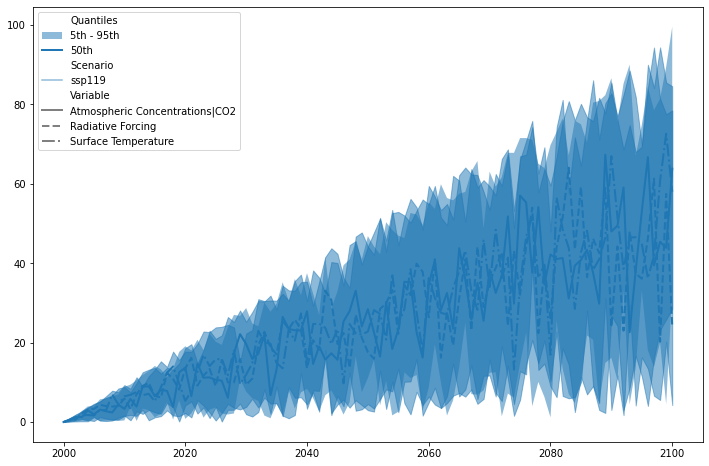

In [13]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(quantile_over="run_id")

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7f111ef88400>])

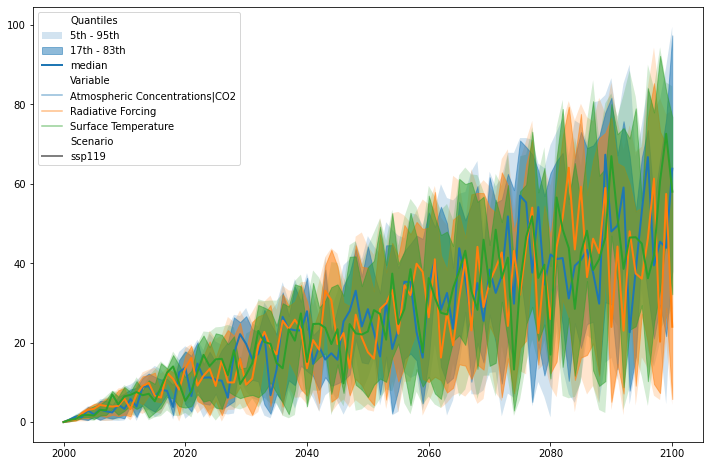

In [14]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(
    quantile_over="run_id",
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
)

#### Pre-calculated quantiles

Alternately, we can cast the output of `quantiles_over` to an `ScmRun` object for ease of filtering and plotting.

In [15]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun = ScmRun(summary_stats)
summary_stats_scmrun

<ScmRun (timeseries: 21, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model quantile region scenario   unit                        variable
	0   example     0.05  World   ssp119    ppm  Atmospheric Concentrations|CO2
	1   example     0.05  World   ssp119  W/m^2               Radiative Forcing
	2   example     0.05  World   ssp119      K             Surface Temperature
	3   example     0.17  World   ssp119    ppm  Atmospheric Concentrations|CO2
	4   example     0.17  World   ssp119  W/m^2               Radiative Forcing
	5   example     0.17  World   ssp119      K             Surface Temperature
	6   example      0.5  World   ssp119    ppm  Atmospheric Concentrations|CO2
	7   example      0.5  World   ssp119  W/m^2               Radiative Forcing
	8   example      0.5  World   ssp119      K             Surface Temperature
	9   example     0.83  World   ssp119    ppm  Atmospheric Concentrations|CO2
	10  example     0.83  World   ssp119  W/m^2

As discussed above, casting the output of `quantiles_over` to an `ScmRun` object helps avoid repeatedly calculating the quantiles.

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7f1126da8bb0>])

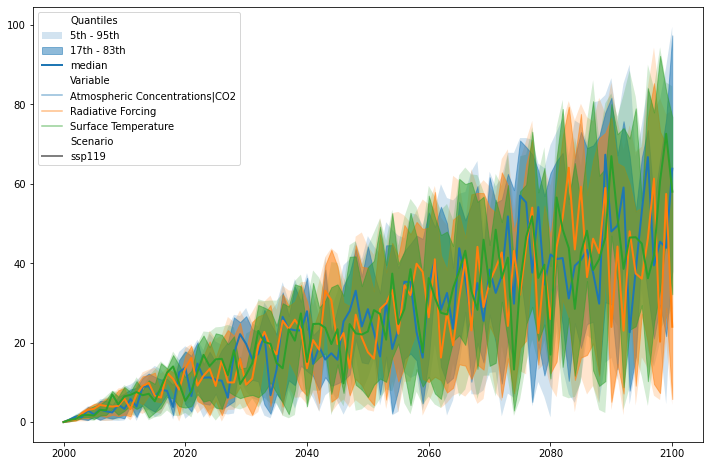

In [16]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.plumeplot(
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
    pre_calculated=True,
)

If we don't want a plume plot, we can always our standard lineplot method.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

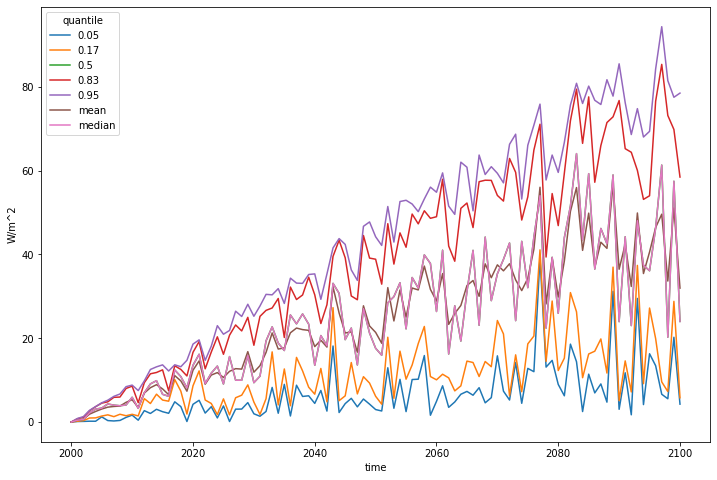

In [17]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.filter(variable="Radiative Forcing").lineplot(hue="quantile")

## `groupby`

The `groupby` method allows us to group the data by columns in `scmrun.meta` and then perform operations. An example is given below.

In [18]:
# NBVAL_IGNORE_OUTPUT
variable_means = []
for vdf in runs.groupby("variable"):
    vdf_mean = vdf.timeseries().mean(axis=0)
    vdf_mean.name = vdf.get_unique_meta("variable", True)
    variable_means.append(vdf_mean)

pd.DataFrame(variable_means)

time,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,...,2094-01-01,2095-01-01,2096-01-01,2097-01-01,2098-01-01,2099-01-01,2100-01-01
Atmospheric Concentrations|CO2,0.0,0.544200,1.237169,1.391303,2.280427,2.284976,2.963718,...,37.530181,54.212907,56.982167,41.741813,47.772304,46.854595,65.899386
Radiative Forcing,0.0,0.450652,0.704252,1.874093,2.523567,3.102306,3.550064,...,35.443199,40.578831,46.431627,49.603535,33.646813,51.105430,31.962836
Surface Temperature,0.0,0.509098,1.000322,1.623729,2.110046,2.154148,3.089248,...,50.101831,42.438411,43.391222,48.033850,60.472082,65.846950,56.223060


## `groupby_all_except`

The `groupby_all_except` method allows us to group the data by all columns in `scmrun.meta` except for a certain set. Like with `groupby`, we can then use the groups to perform operations. An example is given below. Note that, in most cases, using `process_over` is likely to be more useful. 

In [19]:
# NBVAL_IGNORE_OUTPUT
ensemble_means = []
for edf in runs.groupby_all_except("run_id"):
    edf_mean = edf.timeseries().mean(axis=0)
    edf_mean.name = edf.get_unique_meta("variable", True)
    ensemble_means.append(edf_mean)

pd.DataFrame(ensemble_means)

time,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,...,2094-01-01,2095-01-01,2096-01-01,2097-01-01,2098-01-01,2099-01-01,2100-01-01
Surface Temperature,0.0,0.509098,1.000322,1.623729,2.110046,2.154148,3.089248,...,50.101831,42.438411,43.391222,48.033850,60.472082,65.846950,56.223060
Radiative Forcing,0.0,0.450652,0.704252,1.874093,2.523567,3.102306,3.550064,...,35.443199,40.578831,46.431627,49.603535,33.646813,51.105430,31.962836
Atmospheric Concentrations|CO2,0.0,0.544200,1.237169,1.391303,2.280427,2.284976,2.963718,...,37.530181,54.212907,56.982167,41.741813,47.772304,46.854595,65.899386


As we said, in most cases using `process_over` is likely to be more useful. For example the above can be done using `process_over` in one line (and more metadata is retained).

In [20]:
# NBVAL_IGNORE_OUTPUT
runs.process_over("run_id", "mean")

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0    0.544200    1.237169    1.391303   
                        W/m^2 Radiative Forcing                      0.0    0.450652    0.704252    1.874093   
                        K     Surface Temperature                    0.0    0.509098    1.000322    1.623729   

time                                                          2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  \
model   region scenario unit  variable                                                            ...               
example World  ssp119   ppm   Atmospheric Concentrations|CO2    2.280427    2.284976    2.963718  ...   37.530181   
                        W/m^2 Radiative Forcing                 2.523567    3.102306    3.550064  ...   35.443199   
                        K     Surface Temperature               2.110046    2.154148    3.089248  ...   50.101831   

time                                                          2095-01-01  2096-01-01  2097-01-01  2098-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   ppm   Atmospheric Concentrations|CO2   54.212907   56.982167   41.741813   47.772304   
                        W/m^2 Radiative Forcing                40.578831   46.431627   49.603535   33.646813   
                        K     Surface Temperature              42.438411   43.391222   48.033850   60.472082   

time                                                          2099-01-01  2100-01-01  
model   region scenario unit  variable                                                
example World  ssp119   ppm   Atmospheric Concentrations|CO2   46.854595   65.899386  
                        W/m^2 Radiative Forcing                51.105430   31.962836  
                        K     Surface Temperature              65.846950   56.223060  

[3 rows x 101 columns]